# **Machine Learning Project: Clustering and Classifying Spotify Tracks**
## Introduction

Music is more than just sound, it is a complex combination of patterns, emotions, and measurable characteristics.
By analyzing thousands of Spotify tracks through machine learning, our project aims to sort and group different musical structures together, so that people can have a better understanding at which genre their favorite songs correspond to.

In this project, we analyze a Kaggle large dataset of Spotify tracks including various audio features such as danceability, energy, acousticness, instrumentalness, tempo, and more.


The main goal is to begin with unsupervised learning to create groups (clusters) of tracks that share similar musical characteristics. These clusters are then used as new labels for a supervised learning phase.

## PHASE 1 — UNSUPERVISED LEARNING

### A. Data Exploration

We first import the libraries we will use :

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


We load the imported dataset and we print the first rows of it.

In [62]:
df = pd.read_csv("dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Our dataset has 114 000 rows of 21 columns :

In [63]:
df.shape

(114000, 21)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [65]:
df.describe()


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In this project, we will focus on the caracteristics of the song such as its energy, danceability, loudness etc. We therefore won't consider some columns of data as popularity, artist or album_name for example. We will justify our choices in more details during the data processing.

In [66]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

-->  We only have 1 value missing in 3 of our column.

In [67]:
print(df.duplicated().sum())

0


-->  We have 0 duplicate rows

In [68]:
(df["track_id"].value_counts() > 1).sum()


np.int64(16641)

--> However, there are 16641 rows having the same id as at least an other row. We will get rid of the duplicates in the data processing

Let's now search for outliers on useful columns :

#### Duration_ms column :

In [69]:
df["duration_ms"].describe()


count    1.140000e+05
mean     2.280292e+05
std      1.072977e+05
min      0.000000e+00
25%      1.740660e+05
50%      2.129060e+05
75%      2.615060e+05
max      5.237295e+06
Name: duration_ms, dtype: float64

In [70]:
df = df[df["duration_ms"] > 60000]

We take the tracks longer than 1minute, because if we have a very small song, we can't really analyse properly the characteristics of the track.

In [71]:
df["duration_ms"].describe()

count    1.131270e+05
mean     2.294231e+05
std      1.065234e+05
min      6.000900e+04
25%      1.752000e+05
50%      2.135000e+05
75%      2.620750e+05
max      5.237295e+06
Name: duration_ms, dtype: float64

#### Speechiness column :

In [72]:
df["speechiness"].describe()

count    113127.000000
mean          0.084196
std           0.104942
min           0.000000
25%           0.035800
50%           0.048800
75%           0.084100
max           0.963000
Name: speechiness, dtype: float64

In [73]:
df = df[df["speechiness"] < 0.5]

Here we decide to delete the tracks in which its half or more is considered to be composed of spoken words and not sung ones. By doing this, we get rid of the podcasts or audio books.

In [74]:
df["speechiness"].describe()

count    111983.000000
mean          0.076738
std           0.073155
min           0.000000
25%           0.035700
50%           0.048500
75%           0.081950
max           0.499000
Name: speechiness, dtype: float64

#### Loudness column :


In [75]:
df["loudness"].describe()


count    111983.000000
mean         -8.202857
std           4.977790
min         -49.531000
25%          -9.932000
50%          -6.970000
75%          -4.985000
max           4.532000
Name: loudness, dtype: float64

In [76]:
df = df[df["loudness"]>-35]
df = df[df["loudness"]<-3]

We take the values between -35 and -3 because in spotify normalised dB analyzer, tracks below -35dB are mostly ambient or field recordings, and tracks above -3dB mostly are anomalies or very compressed songs.

In [77]:
df["loudness"].describe()


count    105989.000000
mean         -8.475499
std           4.736174
min         -34.991000
25%         -10.142000
50%          -7.205000
75%          -5.277000
max          -3.001000
Name: loudness, dtype: float64

#### Tempo column :

In [78]:
df["tempo"].describe()


count    105989.000000
mean        121.723567
std          29.562619
min           0.000000
25%          99.098000
50%         121.967000
75%         139.990000
max         243.372000
Name: tempo, dtype: float64

In [79]:
df = df[df["tempo"]>40]
df = df[df["tempo"]<200]


The average BPM range for music in general is set between 40BPM (R&B / Chill) and 200BPM (Punk Rock / EDM). This is why the  values outside this range are considered errors.

In [80]:
df["tempo"].describe()


count    105314.000000
mean        121.468664
std          28.727789
min          41.858000
25%          99.059000
50%         121.904000
75%         139.956000
max         199.998000
Name: tempo, dtype: float64

#### Liveness column:

In [81]:
df["liveness"].describe()

count    105314.000000
mean          0.207190
std           0.183887
min           0.009860
25%           0.097400
50%           0.129000
75%           0.262000
max           1.000000
Name: liveness, dtype: float64

In [82]:
df = df[df["liveness"]<0.8]

We take the songs having less than 0.8, because above this value the track is considered performed live, with the detection of an audience. Having songs performed live would alter the precision of its other original characteristics.

In [83]:
df["liveness"].describe()

count    102522.000000
mean          0.188030
std           0.144238
min           0.009860
25%           0.096500
50%           0.126000
75%           0.245000
max           0.799000
Name: liveness, dtype: float64

### B. Data Preprocessing

We will apply a Principal Component Analysis on our dataset, since we have a lot a highly correlated columns such as energy and loudness for example. These close values will perturb the KMeans clustering so we will group them in new columns less correlated between each other.

Let's first delete the missing values and the duplicated rows before selecting the columns :

In [84]:
df = df.dropna()
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Even if the missing values were on columns that we won't use, these songs could be errors so we find it better deleting the rows directly. Since they are just a few, the lost of data is very negligible.

In [85]:
df = df.drop_duplicates(subset='track_id', keep='first')
print("Remaining rows after removing duplicate track IDs:", len(df))

Remaining rows after removing duplicate track IDs: 80358


The dataset had 16,641 duplicated track IDs.
Since track_id should be unique, we removed all duplicated IDs to ensure each track appears only once in the dataset.


Let's now select all the columns that will be useful for our project. We want musical features. That is why we will only consider the following features :
**<br>**
**<br>**
- danceability: represents how suitable a track is for dancing, capturing rhythm stability and beat strength.

- energy: measures intensity and activity, useful for separating calm acoustic tracks from loud electronic or rock music.

- loudness: reflects overall volume and mastering style, which varies strongly across genres.

- acousticness: indicates whether a track is acoustic, helping distinguish folk/classical from electronic styles.

- valence: describes the emotional positivity of a track, separating sad/depressing songs from happy/energetic ones.

- tempo: BPM can strongly influence musical style (ex: techno vs R&B).

**<br>**
**<br>**
We deliberately do not keep all available audio features in our clustering model.
Instead, we focus on a subset that describes the global musical character of a track.
The following features are therefore excluded :

- Speechiness:
This feature mainly detects spoken words and is useful to distinguish podcasts or speech‑heavy tracks.
However, it does not structure musical styles in a continuous way (rock, pop, techno, etc.), but rather separates “music vs speech”.
Keeping it would create clusters driven by the presence of speech instead of musical style.

- Liveness:
Liveness indicates whether a track was recorded live (audience, room noise).
Live vs studio is a recording condition, not a musical style.
Including liveness would risk forming clusters that mix very different genres simply because they are live recordings.

- Instrumentalness:
This feature mostly separates instrumental tracks from vocal ones.
This noes not help us recognize a style : many very different genres can be instrumental (classical, ambient, lo‑fi, soundtracks).
Using instrumentalness as a clustering dimension would therefore fragment the data according to the presence of vocals rather than musical structure.

- Duration_ms:
Track length doesn't have an important impact on musical style.
It may create clusters of “short vs long tracks” that are not musically meaningful.

- track_id / artists / album_name / track_name / popularity / explicit / key / mode / time_signature / track_genre(ignored) :
Ignored because they are not relevant to an analysis over musical characteristics of the tracks.

**<br>**
**<br>**
By removing these features from the clustering step, we keep only variables that are directly linked to perceived musical style (intensity, rhythm, valence, tempo).
This reduces the dimensionality of the problem, simplifies the decision boundaries of KMeans, and helps prevent the model from overfitting. Recording conditions, presence of speech, track length do not correspond to the musical structure we want to study.


In [106]:
selected_features = [
    'danceability',
    'energy',
    'loudness',
    'acousticness',
    'valence',
    'tempo',
]

df_features = df[selected_features].copy()

print("Selected features:")
df_features.head()


Selected features:


,danceability,energy,loudness,acousticness,valence,tempo
0,0.676,0.4610,-6.746,0.0322,0.715,87.917
1,0.420,0.1660,-17.235,0.9240,0.267,77.489
2,0.438,0.3590,-9.734,0.2100,0.120,76.332
3,0.266,0.0596,-18.515,0.9050,0.143,181.740
4,0.618,0.4430,-9.681,0.4690,0.167,119.949


We now have a new dataframe called df_features, having only useful columns. We got rid of columns like track_id, artists, album_name, track_name, popularity because they are irrelevant in the musical analysis of a song.

In [107]:
print("Final number of rows:", len(df_features))
print("Final number of columns:", df_features.shape[1])

Final number of rows: 80358
Final number of columns: 6


#### Standardization of the dataframe :

In [108]:
sc = StandardScaler()
X_scaled = sc.fit_transform(df_features)
df_scaled = pd.DataFrame(X_scaled, columns=df_features.columns)
df_scaled.head()

,danceability,energy,loudness,acousticness,valence,tempo
0,0.615562,-0.624400,0.399300,-0.885717,0.936149,-1.167989
1,-0.843962,-1.796673,-1.750303,1.748433,-0.770769,-1.530675
2,-0.741339,-1.029728,-0.213057,-0.360541,-1.330852,-1.570916
3,-1.721957,-2.219486,-2.012625,1.692312,-1.243220,2.095179
4,0.284888,-0.695928,-0.202195,0.404479,-1.151778,-0.053915


### C. Professional visualizations

Lets now draw the heatmap between the different columns so that we can have a better look at the correlations for the PCA.

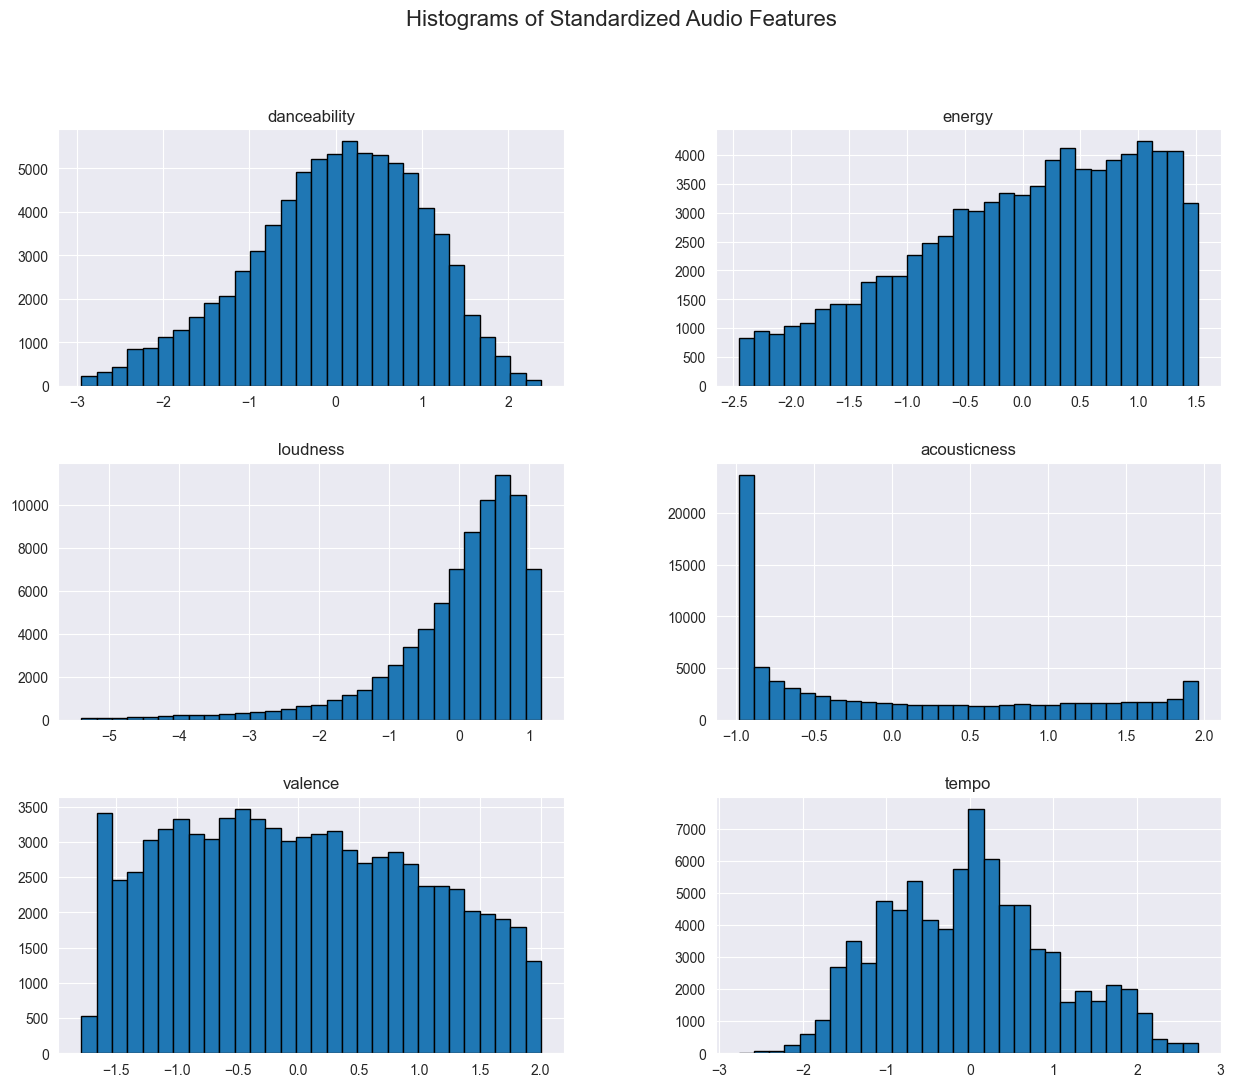

In [109]:
df_scaled.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle("Histograms of Standardized Audio Features", fontsize=16)
plt.show()

Most features in the dataset show non-normal and highly skewed distributions, which is expected for audio descriptors:

- Danceability & Valence:

These two features present distributions close to symmetric, suggesting a wide range of emotional and rhythmic profiles in the dataset.
**<br>**
**<br>**

- Energy & Loudness :

Both distributions are shifted towards higher values, confirming that modern Spotify tracks tend to be energetic and loud.
**<br>**
**<br>**

- Tempo :

Slightly multimodal distribution, reflecting the existence of common BPM ranges in popular music (≈70–90, 110–130, 140+ BPM).
**<br>**
**<br>**

- Acousticness :

Extremely left-skewed distributions:
This shape is consistent with modern Spotify catalogs, where fully acoustic songs (like classical music) represent a relatively small proportion compared to pop, hip‑hop, EDM or rock productions..
**<br>**
**<br>**

Conclusion:
The dataset contains a mix of musical styles, but many features are strongly skewed, suggesting the need for standardization (already done) and mix of highly correlated columns for clustering.

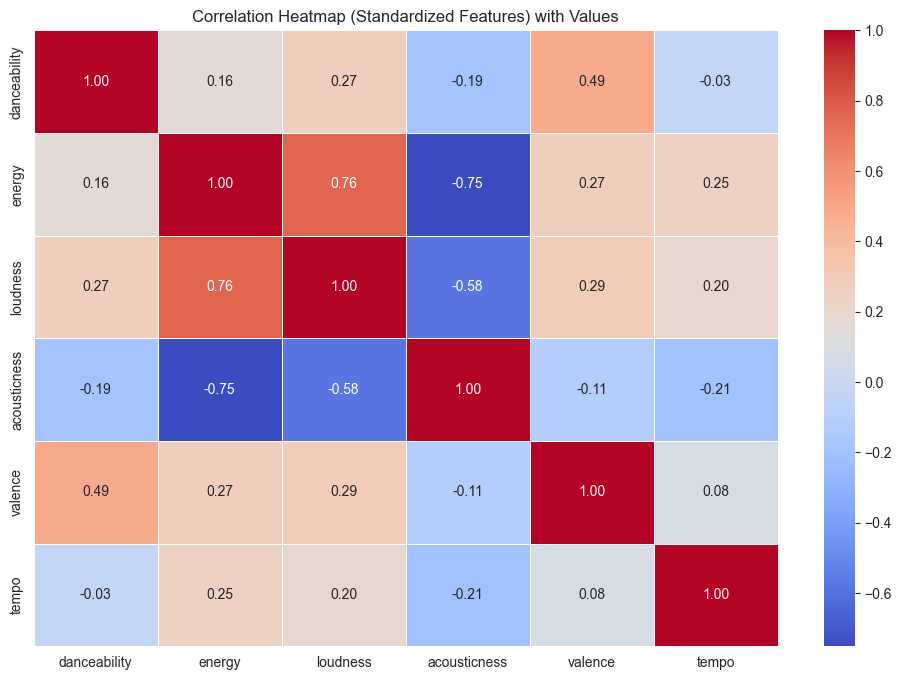

In [110]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df_scaled.corr(),
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Heatmap (Standardized Features) with Values")
plt.show()

With a threshold of 0.7, We can notice that :

*loudness and energy columns are highly correlated (0.76)*

*acousticness and energy are highly anticorrelated(-0.75)*

We will take these 3 parameters for our PCA. Features with weaker correlations are kept as independent so it prevents from influencing the PCA components incorrectly.

Let's take a look at these correlations :

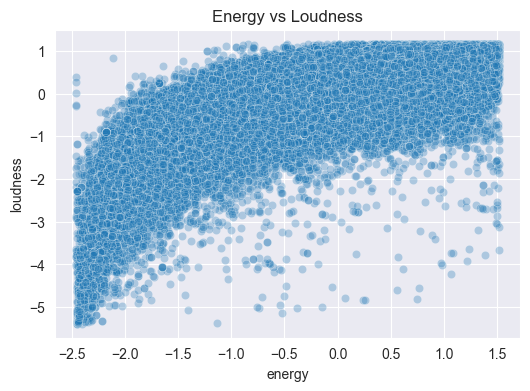

In [111]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df_scaled["energy"], y=df_scaled["loudness"], alpha=0.3)
plt.title("Energy vs Loudness")
plt.show()

The scatter plot shows a clear positive linear trend: more energetic tracks tend to be louder.
This strong correlation indicates redundancy between both features.

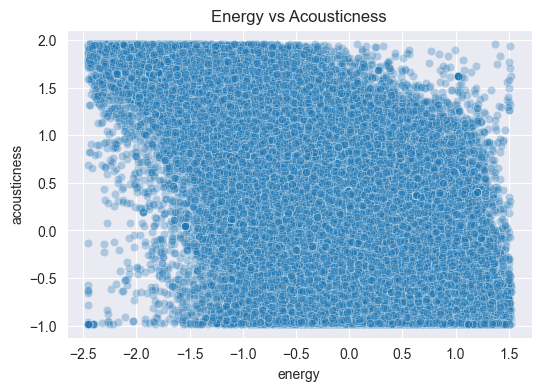

In [112]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df_scaled["energy"], y=df_scaled["acousticness"], alpha=0.3)
plt.title("Energy vs Acousticness")
plt.show()

We observe a strong negative correlation: energetic tracks are rarely acoustic, while acoustic tracks have lower energy.
**<br>**
**<br>**
These relationships justify applying PCA on energy, loudness, and acousticness to reduce redundancy and form a more meaningful single feature capturing musical intensity.

### Principal Component Analysis :

In [113]:
from sklearn.decomposition import PCA
## we create the dataframe for the PCA
X_pca_input = df_scaled[['energy', 'loudness', 'acousticness']]
## we create an instance of PCA
pca = PCA()
## we give the dataframe to the model to train
pca.fit(X_pca_input)

PCA()

Let's compute the variance of each component :

In [94]:
variance = pca.explained_variance_ratio_
variance

array([0.79993263, 0.13916466, 0.06090271])

We notice that the first component represents almost 80% of the total variance.This means these three features share a strong common structure captured by PC1, making the remaining components unnecessary.
We therefore keep only PC1 to avoid redundancy and reduce dimensionality.

In [114]:
pca = PCA(n_components=1)
X_pca = pca.fit_transform(df_scaled[['energy', 'loudness', 'acousticness']])
df_pca = pd.DataFrame(X_pca, columns=['Musical Intensity Component'])

PC1 captures the relation between energy, loudness, and acousticness.
It increases with energetic and loud tracks, and decreases for acoustic tracks.
Therefore, PC1 can be interpreted as a “Musical Intensity Component”, separating electronic/high-energy songs from calm, acoustic ones.

In [96]:
df_pca.head()

,Musical Intensity Component
0,0.342206
1,-3.056641
2,-0.543153
3,-3.429669
4,-0.763090


We add the new Musical Intensity Component and the other columns into our final dataframe :

In [115]:
df_final = pd.concat([
    df_pca,
    df_scaled[['danceability','valence','tempo',]]
], axis=1)

### D. KMeans clustering :

In [120]:
## we make a copy of the final dataframe
X = df_final.copy()

## we create an empty list that will contain the error for each k
error = []

## We evaluate k between 1 and 9. Larger values of k would produce many small clusters that are difficult to interpret as broad musical styles, while still increasing computation time.
k_range = range(1, 10)

for k in k_range:
    ## we create a kmeans model for a given k
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    ## Train the K-Means model: find cluster centers and assign each point to the nearest center
    km.fit(X)

    error.append(km.inertia_)
    ## km.inertia --> sum of the distances between points and their cluster for a given k

### E. Determine Optimal Number of Clusters :

#### Elbow method:

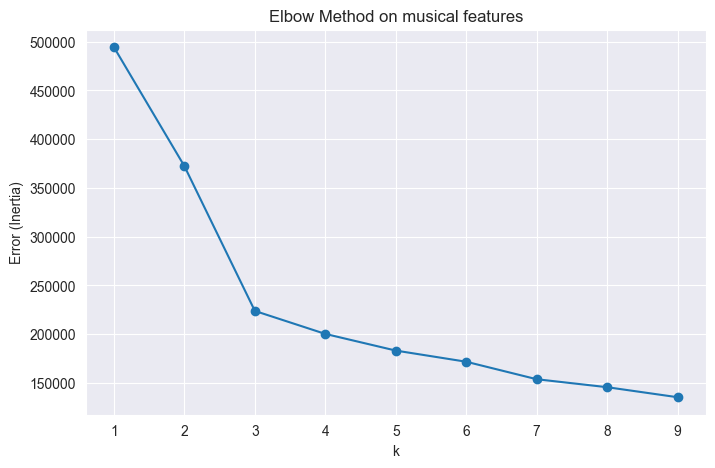

In [121]:
plt.figure(figsize=(8,5))
plt.plot(k_range, error, marker='o')
plt.xlabel('k')
plt.ylabel('Error (Inertia)')
plt.title('Elbow Method graph')
plt.grid(True)
plt.show()

We can clearly notice where the value of the error starts decreasing slowly : k = 3
This indicates that most of the structure in the data is already captured by 3 clusters.

#### Silhouette score:

In [129]:
print("Silhouette scores:")

for k in range(2, 7):
    ## create a kmeans model for a given k
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    ## fit the model and get the cluster labels for each song(row)
    labels = km.fit_predict(X)
    ## compute the silhouette score for the clustering with a given k
    score = silhouette_score(X, labels)
    print(f"k = {k} --> silhouette score = {score:.4f}")

Silhouette scores:


KeyboardInterrupt: 

The silhoouette score method confirms the results of the elbow diagram, since here the the score of k=3 (0.3732) is the highest among all the values of k tested between 2 and 6.

### F. Final KMeans and creation of the cluster colmun :

In [126]:
km_final = KMeans(n_clusters=3, random_state=42, n_init='auto')

cluster_labels = km_final.fit_predict(X)

## creation of the cluster column
df_final['cluster'] = cluster_labels

df_final

,Musical Intensity Component,danceability,valence,tempo,cluster
0,0.342206,0.615562,0.936149,-1.167989,0
1,-3.056641,-0.843962,-0.770769,-1.530675,2
2,-0.543153,-0.741339,-1.330852,-1.570916,2
3,-3.429669,-1.721957,-1.243220,2.095179,2
4,-0.763090,0.284888,-1.151778,-0.053915,2
...,...,...,...,...,...
80353,-2.322866,-2.257876,-1.658901,0.156365,2
80354,-3.415761,-2.246473,-1.654709,-1.261130,2
80355,-1.837080,0.347602,1.042832,0.378366,2
80356,-0.604896,0.108149,-0.214497,0.502949,0


We now have all of our tracks assigned to one of the three clusters.Let's now analyse the means of our features for each cluster so that we can assign to each of them a specific musical type.

In [130]:
cluster_profile = df_final.groupby('cluster').mean()
cluster_profile

,Musical Intensity Component,danceability,valence,tempo
cluster,,,,
0,0.424691,0.721242,0.769660,-0.133138
1,1.054711,-0.494079,-0.540367,0.482701
2,-2.232616,-0.637977,-0.662701,-0.422489


#### Cluster 0 – Energetic / Dance‑oriented happy tracks
- Musical Intensity Component ≈ 0.42 (above average)
- Danceability ≈ 0.72 (high)
- Valence ≈ 0.77 (high, positive mood)
- Tempo ≈ -0.13 (around the global average)

Cluster 0 groups tracks with moderately high intensity, high danceability and high valence.
These songs are rhythmically engaging and emotionally positive, which corresponds to dance‑oriented, feel‑good music such as mainstream pop, EDM and upbeat chart hits.
**<br>**
**<br>**
#### Cluster 1 – Fast, intense but darker / tense tracks
- Musical Intensity Component ≈ 1.05 (very high)
- Danceability ≈ -0.49 (below average)
- Valence ≈ -0.54 (low, negative mood)
- Tempo ≈ 0.48 (clearly above average, faster BPM)

Cluster 1 contains the most intense and fastest tracks in the dataset, but with lower danceability and negative valence.
This combination suggests high‑energy but darker music, for example aggressive rock, metal, hard techno or cinematic, tense tracks where speed and loudness dominate over groove and happiness.
**<br>**
**<br>**
#### Cluster 2 – Calm, acoustic / low‑energy sad tracks
- Musical Intensity Component ≈ -2.23 (very low)
- Danceability ≈ -0.64 (low)
- Valence ≈ -0.66 (low, rather sad)
- Tempo ≈ -0.42 (slower than average)

Cluster 2 groups low‑intensity, slow and low‑valence songs with very small danceability.
These tracks correspond to calm, often acoustic or mellow music, such as ballads, ambient pieces or R&B songs, typically associated with a sad or relaxed mood.

## PHASE 2 — SUPERVISED LEARNING

#### In this part, we will apply KNN classification and Random Forest supervised models over our final dataframe containing the new "cluster" column